<a href="https://colab.research.google.com/github/am610/arXiv_2209.14542/blob/main/GW_RF_arXiv_2209_14542_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### @Ayan Mitra
##### 2022

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import joblib
import io
import logging
logging.getLogger('tensorflow').disabled = True
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_val_predict, GridSearchCV 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA, IncrementalPCA
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm,Normalize
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import scipy.fftpack
#import hampel
import random
import sklearn
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
warnings.filterwarnings('ignore')
import sys
import seaborn as sns
from pylab import *
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as mpl
from scipy import interpolate
from numpy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.decomposition import PCA
from google.colab import files
from scipy.fft import fft, ifft, fftfreq

column = ['t','orig_w','filt_w','smt_w']

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
a = pd.read_csv('drive/MyDrive/ML_dataS1.csv')
a

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,9991.0.1,9992.0.1,9993.0.1,9994.0.1,9995.0.1,9996.0.1,9997.0.1,9998.0.1,9999.0.1,Label
0,-19.0,-18.996,-18.992,-18.988,-18.984,-18.98,-18.976,-18.972,-18.968,-18.964,...,8.569422,8.141159,7.708673,7.273616,6.837634,6.402358,5.969398,5.540328,5.116681,s12A1O01
1,-19.0,-18.996,-18.992,-18.988,-18.984,-18.98,-18.976,-18.972,-18.968,-18.964,...,-5.103105,-4.960695,-4.807163,-4.643402,-4.470339,-4.288926,-4.100138,-3.904967,-3.704418,s12A1O01.5
2,-19.0,-18.996,-18.992,-18.988,-18.984,-18.98,-18.976,-18.972,-18.968,-18.964,...,28.579261,27.393446,26.191528,24.976529,23.751601,22.520001,21.285077,20.050240,18.818952,s12A1O02
3,-19.0,-18.996,-18.992,-18.988,-18.984,-18.98,-18.976,-18.972,-18.968,-18.964,...,70.452702,68.514549,66.441072,64.241537,61.925825,59.504371,56.988103,54.388371,51.716883,s12A1O02.5
4,-19.0,-18.996,-18.992,-18.988,-18.984,-18.98,-18.976,-18.972,-18.968,-18.964,...,-86.955203,-84.081474,-81.075610,-77.949718,-74.716462,-71.388985,-67.980834,-64.505880,-60.978238,s12A1O03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,-19.0,-18.996,-18.992,-18.988,-18.984,-18.98,-18.976,-18.972,-18.968,-18.964,...,120.486295,117.751689,114.917599,111.994039,108.991482,105.920799,102.793193,99.620134,96.413289,s75A5O05.5
501,-19.0,-18.996,-18.992,-18.988,-18.984,-18.98,-18.976,-18.972,-18.968,-18.964,...,0.730396,2.326324,3.971224,5.659654,7.385943,9.144232,10.928500,12.732604,14.550310,s75A5O06
502,-19.0,-18.996,-18.992,-18.988,-18.984,-18.98,-18.976,-18.972,-18.968,-18.964,...,42.719668,42.778103,42.850445,42.935947,43.033806,43.143175,43.263161,43.392839,43.531251,s75A5O06.5
503,-19.0,-18.996,-18.992,-18.988,-18.984,-18.98,-18.976,-18.972,-18.968,-18.964,...,71.688178,70.653975,69.607243,68.550828,67.487657,66.420720,65.353048,64.287702,63.227750,s75A5O07


-2.0
6.0

 SNR = 99
Fitting 2 folds for each of 2 candidates, totalling 4 fits
GRID Search Complete

 
 Tuned parameters 

 RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       n_estimators=370, warm_start=True)

 Accuracy = 0.683
Confusion Matrix =  [[ 7  4  0  1]
 [ 4  5  0  0]
 [ 0  1  6  2]
 [ 0  0  1 10]]

 Accuracy = 0.683
Confusion Matrix =  [[ 7  4  0  1]
 [ 4  5  0  0]
 [ 0  1  6  2]
 [ 0  0  1 10]]
----------------
Test Data 
----------------
              precision    recall  f1-score   support

          12       0.64      0.58      0.61        12
          15       0.50      0.56      0.53         9
          27       0.86      0.67      0.75         9
          40       0.77      0.91      0.83        11

    accuracy                           0.68        41
   macro avg       0.69      0.68      0.68        41
weighted avg       0.69      0.68      0.68        41

----------------
Train Data
----------------
              pre

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

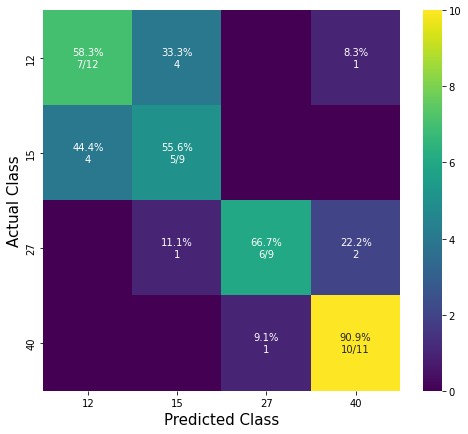

Time Taken: 8.058547973632812e-05


In [ ]:
# -*- coding: utf-8 -*-
"""GW_highres_RF_FREQUENCY.py

Original file is located at
    https://colab.research.google.com/drive/1fT5xzQ-bGbRnbneligPPZXz7TlifJvsO

##### @Ayan Mitra
##### 2022
"""
%timeit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import joblib
import io
import time
startTime_1 = time.time()
import logging
logging.getLogger('tensorflow').disabled = True
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
import sklearn.metrics as skm
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_val_predict, GridSearchCV 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA, IncrementalPCA
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm,Normalize
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import scipy.fftpack
#import hampel
import random
import sklearn
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
warnings.filterwarnings('ignore')
import sys
import seaborn as sns
from pylab import *
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as mpl
from scipy import interpolate
from numpy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.decomposition import PCA
from google.colab import files
from scipy.fft import fft, ifft, fftfreq

column = ['t','orig_w','filt_w','smt_w']


######
# Functions
######
def plot(i):
  plt.plot(Time.iloc[i],Signal.iloc[i],'.',label='%s'%i)
  plt.legend()
  plt.show()
  plt.close()
def noise(snr,input):
  target_snr_db = snr
  watts = input**2
  sig_avg_watts = np.mean(watts)
  sig_avg_db = 10 * np.log10(sig_avg_watts)
  noise_avg_db = sig_avg_db - target_snr_db
  noise_avg_watts = 10 ** (noise_avg_db / 10) # variance
  mean_noise = 0 #mu
  noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(watts))
  x_volts = input
  y_volts = x_volts + noise_volts
  return y_volts

def fourier_inverse(time, signal,filter_low,filter_high):
  N = len(time)
  T = (time[-1]-time[0])/N # Length / N
  yf = fft(signal)
  xf = fftfreq(N, T)[:N//2]
  yf[filter_low:filter_high] = 0
  iftgw = scipy.fft.ifft(yf)
  return(time,iftgw)

def fourier(time, signal,filter_low,filter_high):
  N = len(time)
  T = (time[-1]-time[0])/N # Length / N
  yf = fft(signal)
  xf = fftfreq(N, T)[:N//2]
  yf[filter_low:filter_high] = 0
  iftgw = scipy.fft.ifft(yf)
  #print(np.shape(signal),np.shape(time))
  return(time,yf)
  
#Confusion Matrix Plotter
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(12,12)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args:
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual Class'
    cm.columns.name = 'Predicted Class'
    fig, ax = plt.subplots(figsize=figsize)

    sns.heatmap(cm, annot=annot, fmt='', ax=ax,cmap="viridis")
    plt.ylabel('Actual Class',fontsize=15)
    plt.xlabel('Predicted Class',fontsize=15)
    #plt.savefig("Confusion.pdf", bbox_inches='tight')
    plt.savefig("drive/MyDrive/Confusion.pdf", bbox_inches='tight')
    files.download('drive/MyDrive/Confusion.pdf')
    plt.show()
    
    
def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print ('\n Accuracy = %.3f'%accuracy)
    print ('Confusion Matrix = ',confusion_matrix(y_test,y_pred))
    M = np.array(confusion_matrix(y_test,y_pred))
    return (accuracy,M)
######
######



np.random.seed(42)
a = pd.read_csv('drive/MyDrive/ML_dataS1.csv')
a = a.iloc[:, 1:]
a = a[~a.Label.str.startswith('s75')]
Label= a.iloc[:, -1]
# 
t=[];s=[];
Time = a.iloc[:,:10000]
Signal = a.iloc[:, 10000:-1]
a = a.iloc[:,:-1]
label0 = []
label1 = []
label2 = []
# 
for i in Label:
    label0.append(i[1:3])
    label1.append(i[3:6])
    label2.append(i[6:])
xlow=4250; xhigh=6251; #-2, +6
T = Time.iloc[:,xlow:xhigh]
S = Signal.iloc[:,xlow:xhigh]



# 
# 
TX = []
TY = []
print(round(np.min(T.iloc[0]),1))
print(round(np.max(T.iloc[0]),1))
xnew = pd.Series(np.linspace((round(np.min(T.iloc[0]),1)),(round(np.max(T.iloc[0]),1)),10000, endpoint=True))
for i in range(np.shape(a)[0]): # 46, 256
  tx = T.iloc[i]
  ty = S.iloc[i]
  f1 = interp1d(tx,ty, kind='cubic',fill_value="extrapolate")
  #print('Original')
  ynew = pd.Series(f1(xnew))
  XC,YC =  xnew,ynew
  SNR = 99
  ynew = pd.Series(noise(SNR,ynew)) # snr adding
  #print('noisy')
  YN=(ynew)
  TX.append(xnew)
  TY.append(ynew)
#
print('\n SNR = %s'%SNR)
TS = pd.DataFrame(TY) # Trying GW wave signal
a = TS
X = a
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
X = X_scaled
y = np.array(label0).ravel()
y = (y[:]).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True,random_state=42)
n_estimators = [int(x) for x in np.linspace(start = 100 ,
                                            stop = 370, num = 2)]
                                            # returns 10 numbers
# # Number of features to consider at every split
max_features = ['auto', 'sqrt','log2',None]
# # Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 250, num = 2)]
# 
max_depth.append(None)
# # Minimum number of samples required to split a node
min_samples_split =[int(x) for x in np.linspace(2, 101, num = 2)]
# 
# # Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(2, 101, num = 2)]
# 
# # Method of selecting samples for training each tree
bootstrap = [True, False]
oob_score = [True, False]
warm_start= [True, False]
# 
# # Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'oob_score': oob_score,
               'warm_start': warm_start}
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 2, cv = 2, verbose=10, random_state=42, n_jobs = -1)
# # Fit the random search model
rf_random.fit(X_train, y_train)
# 

print('GRID Search Complete')
#
best_random = rf_random.best_estimator_
print('\n \n Tuned parameters \n\n',best_random)
evaluate(best_random, X_test, y_test)
mat = evaluate(best_random, X_test, y_test)[1]
mat.dump('Confusion.dat')
#
#filename = 'RF_GW_highres_model_FREQ.sav' # original is without -2 in name
#joblib.dump(best_random,  './'+filename )

y_pred       = best_random.predict(X_test)
y_pred_train = best_random.predict(X_train)
report = pd.DataFrame(list(precision_recall_fscore_support(y_test, y_pred)), #y_train, y_pred_train
            index=['Precision', 'Recall', 'F1-score', 'Support']).T

# Now add the 'Avg/Total' row
report.loc['Avg/Total', :] = precision_recall_fscore_support(y_test, y_pred,
    average='weighted')
report.loc['Avg/Total', 'Support'] = report['Support'].sum()


print('----------------')
print('Test Data ')
print('----------------')
print(skm.classification_report( y_test , y_pred ))
print('----------------')
print('Train Data')
print('----------------')
print(skm.classification_report( y_train , y_pred_train ))
cm_analysis(y_test, y_pred, best_random.classes_, ymap=None, figsize=(8,7))
startTime_2 = time.time()
executionTime_2 = (time.time() - startTime_2)
print('Time Taken: ' + str(executionTime_2))


In [ ]:
R = []
for i in ['mean_test_score', 'std_test_score', 'param_n_estimators']:
        print(i," : ",rf_random.cv_results_[i])
        R.append(rf_random.cv_results_[i])
R = pd.DataFrame(R).T
R.columns = (['Mean','STD','N'])
print(R)

mean_test_score  :  [0.5        0.25555556]
std_test_score  :  [0.00555556 0.        ]
param_n_estimators  :  [370 100]
       Mean       STD      N
0  0.500000  0.005556  370.0
1  0.255556  0.000000  100.0


In [ ]:
a = pd.read_csv('drive/MyDrive/Mean_std.csv')

In [ ]:
a = a[a['STD'].notna()]

In [ ]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

In [ ]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       n_estimators=370, warm_start=True)

In [ ]:
rff = RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       n_estimators=370, warm_start=True)
rff.fit(X_train, y_train)
importances = rff.feature_importances_
std = np.std([tree.feature_importances_ for tree in rff.estimators_], axis=0)

In [ ]:
gini_t = []
for i in range(10000):
  gini_t.append(TX[0][importances['Features'][i]])
gini = pd.concat([pd.Series(gini_t),importances['Gini-Importance']],axis=1)
gini.columns = ['Time','Gini']  

In [ ]:
gini.to_csv('drive/MyDrive/Gini.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

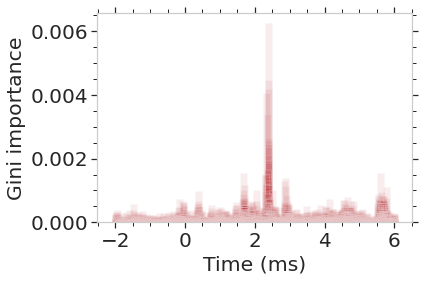

In [ ]:
f,a2 = plt.subplots()
plt.bar(gini.Time,gini['Gini'],alpha=0.1,color='r',width = 0.2)
#plt.scatter(gini.Time,importances['Gini-Importance'])
a2.grid(False)
#plt.colorbar()
a2.minorticks_on()
a2.yaxis.set_ticks_position('both')
a2.xaxis.set_ticks_position('both')
a2.tick_params(axis='both', which='minor', labelsize=12)
a2.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.xlabel('Time (ms)')
plt.ylabel('Gini importance')
plt.savefig("drive/MyDrive/Gini.pdf", bbox_inches='tight')
files.download('drive/MyDrive/Gini.pdf')

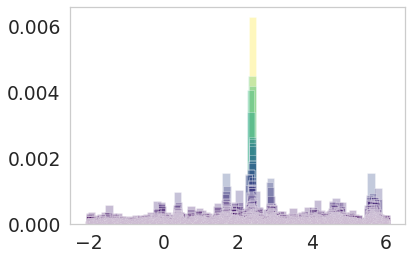

In [ ]:
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.bar(gini.Time,gini['Gini'],alpha=0.3,color=my_cmap(rescale(gini['Gini'])),width = 0.2)
#plt.scatter(gini.Time,importances['Gini-Importance'])
plt.grid(False)
#plt.colorbar()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

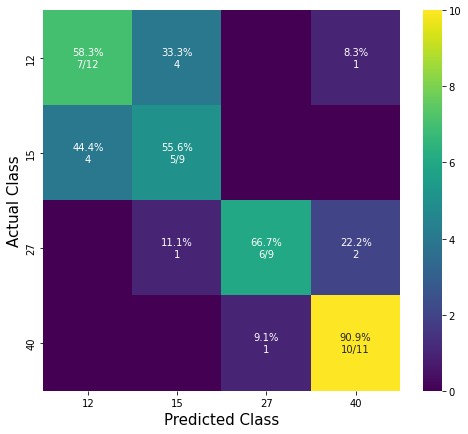

In [ ]:
2#Confusion Matrix Plotter
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(12,12)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args:
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual Class'
    cm.columns.name = 'Predicted Class'
    fig, ax = plt.subplots(figsize=figsize)

    sns.heatmap(cm, annot=annot, fmt='', ax=ax,cmap="viridis")
    plt.ylabel('Actual Class',fontsize=15)
    plt.xlabel('Predicted Class',fontsize=15)
    #plt.savefig("Confusion.pdf", bbox_inches='tight')
    plt.savefig("drive/MyDrive/Confusion.pdf", bbox_inches='tight')
    files.download('drive/MyDrive/Confusion.pdf')
    plt.show()
 
cm_analysis(y_test, y_pred, best_random.classes_, ymap=None, figsize=(8,7))


In [ ]:
# Read in data from Sultan's data file
# Facing problem loading from his google drive location
# Copy-pasting the values

Recall    = pd.DataFrame([[1,10,15,25,35, 51,70,100],[0.22,0.33,0.40,0.56,0.56, 0.56,0.56,0.56],[0.45,0.50,0.50,0.50,0.50,0.50,0.50,0.50],[0.25,0.50,0.50,0.50,0.50,0.50,0.50,0.62],[0.5,1,1,1.,1,1,1.,1.]]).T
Precision = pd.DataFrame([[1,10,25,51,60,70,100],[0.67,0.75,1.0,0.83,0.83,0.83,1.00],[0.14,0.20,0.20,0.20,0.20,0.20,0.20],[0.67, 0.67,0.8,1.0,1.0,1.0,0.83],[0.12,0.33,0.33,0.33,0.33,0.33,0.40]]).T
Accuracy  = pd.DataFrame([[1,10,25,51,70,100],[0.29,0.48,0.58,0.58,0.62,0.68]]).T
Recall.columns = ['SNR','S12','S15','S27','S40']
Precision.columns = ['SNR','S12','S15','S27','S40']
Accuracy.columns = ['SNR','Accuracy']

In [ ]:
Recall

,SNR,S12,S15,S27,S40
0,1.0,0.22,0.45,0.25,0.5
1,10.0,0.33,0.50,0.50,1.0
2,15.0,0.40,0.50,0.50,1.0
3,25.0,0.56,0.50,0.50,1.0
4,35.0,0.56,0.50,0.50,1.0
5,51.0,0.56,0.50,0.50,1.0
6,70.0,0.56,0.50,0.50,1.0
7,100.0,0.56,0.50,0.62,1.0


In [ ]:
Accuracy

,SNR,Accuracy
0,1.0,0.29
1,10.0,0.48
2,25.0,0.58
3,51.0,0.58
4,70.0,0.62
5,100.0,0.68


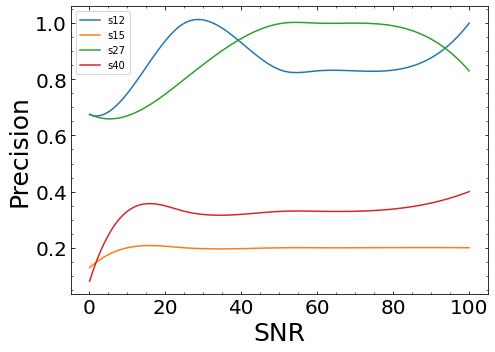

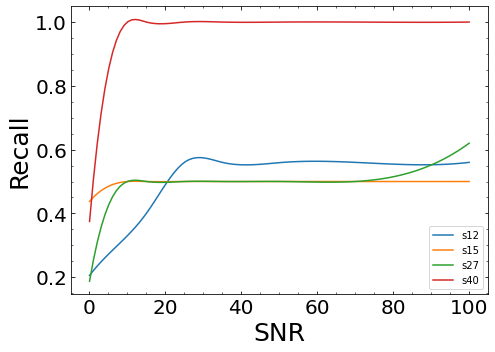

In [ ]:
def interp(x,y):
  f_ = interp1d(x,y, kind='cubic',fill_value="extrapolate") # nearest, extrapolate,cubic
  xnew = np.linspace(0.04,100,100, endpoint=True)
  return (f_)
plt.rcParams['figure.figsize'] = [7,5]
xnew = np.linspace(0.04,100,100, endpoint=True)

f,a2 = plt.subplots()
f__ = interp(Precision.SNR,Precision.S12)
plt.plot(xnew,f__(xnew),label='s12')

f__ = interp(Precision.SNR,Precision.S15)
plt.plot(xnew,f__(xnew),label='s15')

f__ = interp(Precision.SNR,Precision.S27)
plt.plot(xnew,f__(xnew),label='s27')

f__ = interp(Precision.SNR,Precision.S40)
plt.plot(xnew,f__(xnew),label='s40')
plt.legend()
plt.xlabel('SNR',fontsize=25);plt.ylabel('Precision',fontsize=25)
a2.minorticks_on()
a2.yaxis.set_ticks_position('both')
a2.xaxis.set_ticks_position('both')
a2.tick_params(axis='both', which='minor', labelsize=12,direction="in")
a2.tick_params(axis='both', which='major', labelsize=20,direction="in")
plt.tight_layout()
plt.savefig("drive/MyDrive/Precision.pdf", bbox_inches='tight')
#files.download('drive/MyDrive/Precision.pdf')
plt.show()


f,a2 = plt.subplots()
f__ = interp(Recall.SNR,Recall.S12)
plt.plot(xnew,f__(xnew),label='s12')

f__ = interp(Recall.SNR,Recall.S15)
plt.plot(xnew,f__(xnew),label='s15')

f__ = interp(Recall.SNR,Recall.S27)
plt.plot(xnew,f__(xnew),label='s27')

f__ = interp(Recall.SNR,Recall.S40)
plt.plot(xnew,f__(xnew),label='s40')
plt.legend()
plt.xlabel('SNR',fontsize=25);plt.ylabel('Recall',fontsize=25)
a2.minorticks_on()
a2.yaxis.set_ticks_position('both')
a2.xaxis.set_ticks_position('both')
a2.tick_params(axis='both', which='minor', labelsize=12,direction="in")
a2.tick_params(axis='both', which='major', labelsize=20,direction="in")
plt.tight_layout()
plt.savefig("drive/MyDrive/Recall.pdf", bbox_inches='tight')
#files.download('drive/MyDrive/Recall.pdf')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

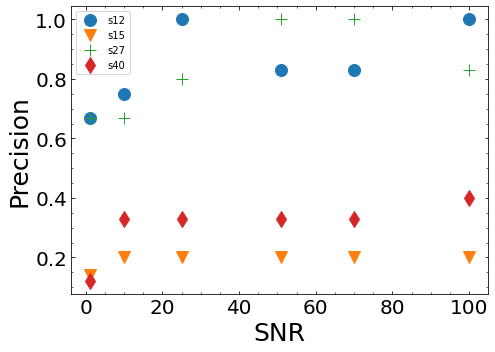

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

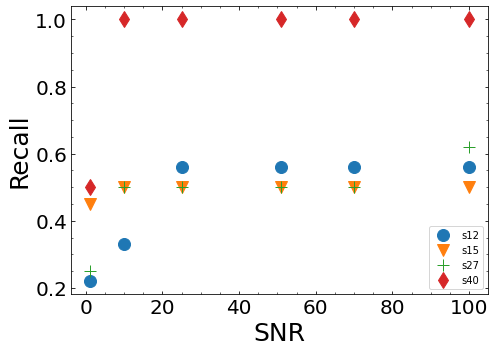

In [ ]:
Recall    = pd.DataFrame([[1,10,25, 51,70,100],[0.22,0.33,0.56, 0.56,0.56,0.56],[0.45,0.50,0.50,0.50,0.50,0.50],[0.25,0.50,0.50,0.50,0.50,0.62],[0.5,1,1,1,1.,1.]]).T
Precision = pd.DataFrame([[1,10,25,51,70,100],[0.67,0.75,1.0,0.83,0.83,1.00],[0.14,0.20,0.20,0.20,0.20,0.20],[0.67, 0.67,0.8,1.0,1.0,0.83],[0.12,0.33,0.33,0.33,0.33,0.40]]).T
Accuracy  = pd.DataFrame([[1,10,25,51,70,100],[0.29,0.48,0.58,0.58,0.62,0.68]]).T
Recall.columns = ['SNR','S12','S15','S27','S40']
Precision.columns = ['SNR','S12','S15','S27','S40']
Accuracy.columns = ['SNR','Accuracy']
def interp(x,y):
  f_ = interp1d(x,y, kind='cubic',fill_value="extrapolate") # nearest, extrapolate,cubic
  xnew = np.linspace(0.04,100,100, endpoint=True)
  return (f_)
plt.rcParams['figure.figsize'] = [7,5]
xnew = np.linspace(0.04,100,100, endpoint=True)

f,a2 = plt.subplots()
f__ = interp(Precision.SNR,Precision.S12)
plt.plot(Precision.SNR,Precision.S12,'o',markersize=12,label='s12')

f__ = interp(Precision.SNR,Precision.S15)
plt.plot(Precision.SNR,Precision.S15,'v',markersize=12,label='s15')

f__ = interp(Precision.SNR,Precision.S27)
plt.plot(Precision.SNR,Precision.S27,'+',markersize=12,label='s27')

f__ = interp(Precision.SNR,Precision.S40)
plt.plot(Precision.SNR,Precision.S40,'d',markersize=12,label='s40')
plt.legend()
plt.xlabel('SNR',fontsize=25);plt.ylabel('Precision',fontsize=25)
a2.minorticks_on()
a2.yaxis.set_ticks_position('both')
a2.xaxis.set_ticks_position('both')
a2.tick_params(axis='both', which='minor', labelsize=12,direction="in")
a2.tick_params(axis='both', which='major', labelsize=20,direction="in")
plt.tight_layout()
plt.savefig("drive/MyDrive/Precision.pdf", bbox_inches='tight')
files.download('drive/MyDrive/Precision.pdf')
plt.show()


f,a2 = plt.subplots()
f__ = interp(Recall.SNR,Recall.S12)
plt.plot(Recall.SNR,Recall.S12,'o',markersize=12,label='s12')

f__ = interp(Recall.SNR,Recall.S15)
plt.plot(Recall.SNR,Recall.S15,'v',markersize=12,label='s15')

f__ = interp(Recall.SNR,Recall.S27)
plt.plot(Recall.SNR,Recall.S27,'+',markersize=12,label='s27')

f__ = interp(Recall.SNR,Recall.S40)
plt.plot(Recall.SNR,Recall.S40,'d',markersize=12,label='s40')
plt.legend()
plt.xlabel('SNR',fontsize=25);plt.ylabel('Recall',fontsize=25)
a2.minorticks_on()
a2.yaxis.set_ticks_position('both')
a2.xaxis.set_ticks_position('both')
a2.tick_params(axis='both', which='minor', labelsize=12,direction="in")
a2.tick_params(axis='both', which='major', labelsize=20,direction="in")
plt.tight_layout()
plt.savefig("drive/MyDrive/Recall.pdf", bbox_inches='tight')
files.download('drive/MyDrive/Recall.pdf')
plt.show()

In [ ]:
Recall

,SNR,S12,S15,S27,S40
0,1.0,0.22,0.45,0.25,0.5
1,10.0,0.33,0.50,0.50,1.0
2,25.0,0.56,0.50,0.50,1.0
3,51.0,0.56,0.50,0.50,1.0
4,70.0,0.56,0.50,0.50,1.0
5,100.0,0.56,0.50,0.62,1.0


In [ ]:
Recall    = pd.DataFrame([[1,10,25, 51,70,100],[0.22,0.33,0.56, 0.56,0.56,0.56],[0.45,0.50,0.50,0.50,0.50,0.50],[0.25,0.50,0.50,0.50,0.50,0.62],[0.5,1,1,1,1.,1.]]).T
Precision = pd.DataFrame([[1,10,25,51,70,100],[0.67,0.75,1.0,0.83,0.83,1.00],[0.14,0.20,0.20,0.20,0.20,0.20],[0.67, 0.67,0.8,1.0,1.0,0.83],[0.12,0.33,0.33,0.33,0.33,0.40]]).T
Accuracy  = pd.DataFrame([[1,10,25,51,70,100],[0.29,0.48,0.58,0.58,0.62,0.68]]).T
print(Precision)

       0     1     2     3     4
0    1.0  0.67  0.14  0.67  0.12
1   10.0  0.75  0.20  0.67  0.33
2   25.0  1.00  0.20  0.80  0.33
3   51.0  0.83  0.20  1.00  0.33
4   70.0  0.83  0.20  1.00  0.33
5  100.0  1.00  0.20  0.83  0.40


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

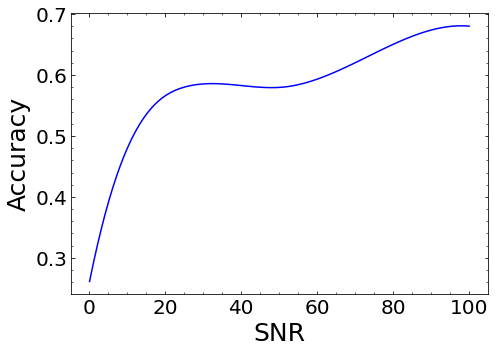

In [ ]:
f,a2 = plt.subplots()
xnew = np.linspace(0.04,100,100, endpoint=True)
f__ = interp(Accuracy.SNR,Accuracy.Accuracy)
plt.plot(xnew,f__(xnew),label='Accuracy',c='b')
#plt.plot(Accuracy.SNR,Accuracy.Accuracy,'o',c='r')
plt.xlabel('SNR',fontsize=25);plt.ylabel('Accuracy',fontsize=25)
a2.minorticks_on()
a2.yaxis.set_ticks_position('both')
a2.xaxis.set_ticks_position('both')
a2.tick_params(axis='both', which='minor', labelsize=12,direction="in")
a2.tick_params(axis='both', which='major', labelsize=20,direction="in")
plt.tight_layout()
plt.savefig("drive/MyDrive/Accuracy.pdf", bbox_inches='tight')
files.download('drive/MyDrive/Accuracy.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

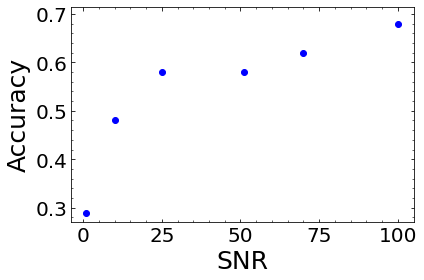

In [ ]:
f,a2 = plt.subplots()
xnew = np.linspace(0.04,100,100, endpoint=True)
#f__ = interp(Accuracy.SNR,Accuracy.Accuracy)
plt.plot(Accuracy.SNR,Accuracy.Accuracy,'o',label='Accuracy',c='b')
#plt.plot(Accuracy.SNR,Accuracy.Accuracy,'o',c='r')
plt.xlabel('SNR',fontsize=25);plt.ylabel('Accuracy',fontsize=25)
a2.minorticks_on()
plt.ylim(0.27,0.715)
a2.yaxis.set_ticks_position('both')
a2.xaxis.set_ticks_position('both')
a2.tick_params(axis='both', which='minor', labelsize=12,direction="in")
a2.tick_params(axis='both', which='major', labelsize=20,direction="in")
plt.tight_layout()
#plt.savefig("drive/MyDrive/Accuracy.pdf", bbox_inches='tight')
#files.download('drive/MyDrive/Accuracy.pdf')

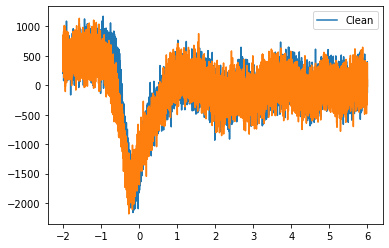

In [ ]:
plt.plot(XC,YC,label='Clean')
plt.plot(XC,YN)
plt.legend()

In [ ]:
#y7 = YN # SNR = 7
#y50= YN
y90= YN

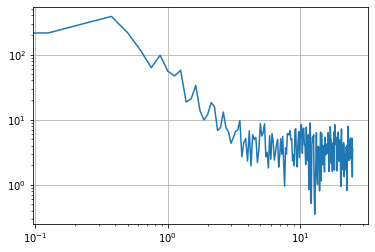

In [ ]:
t1201 = np.array(XC)
gw1201 = np.array(y7)
# Number of sample points
N = len(t1201)
# sample spacing
T = (t1201[-1]-t1201[0])/N
y = gw1201
yf = fft(y)
xf = fftfreq(N, T)[:N//2]


plt.plot(xf[:200], 2.0/N * np.abs(yf[0:N//2])[:200])
plt.yscale('log')
plt.xscale('log')
#plt.xlim(100,4000)
#plt.ylim(10**(-24),10**(-21))
plt.grid()
plt.show()

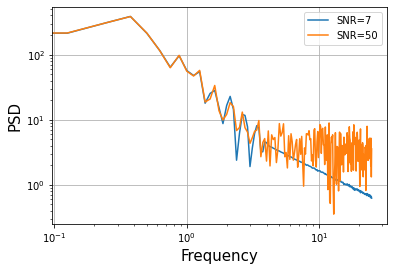

In [ ]:
t1201 = np.array(XC)
gw1201 = np.array(y50)
# Number of sample points
N = len(t1201)
# sample spacing
T = (t1201[-1]-t1201[0])/N
y = gw1201
yf2 = fft(y)
xf = fftfreq(N, T)[:N//2]


plt.plot(xf[:200], 2.0/N * np.abs(yf2[0:N//2])[:200],label='SNR=7')
plt.plot(xf[:200], 2.0/N * np.abs(yf[0:N//2])[:200],label='SNR=50')
plt.yscale('log')
plt.xscale('log')
#plt.xlim(100,4000)
#plt.ylim(10**(-24),10**(-21))
plt.legend()
plt.grid()
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('PSD',fontsize=15)
plt.show()


In [ ]:
plt.close()

In [ ]:
#fig, ax = plt.subplots()
def noise_snr(snr,input,c):
  from scipy.stats import norm
  import statistics
  import seaborn as sns
  target_snr_db = snr
  watts = input**2
  sig_avg_watts = np.mean(watts)
  sig_avg_db = 10 * np.log10(sig_avg_watts)
  noise_avg_db = sig_avg_db - target_snr_db
  noise_avg_watts = 10 ** (noise_avg_db / 10) # variance
  #print('SNR = %s, Variance %s'%(snr, np.sqrt(noise_avg_watts)))
  mean_noise = 0 #mu
  sdiv = np.sqrt(noise_avg_watts)
  noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(watts))
  sns.distplot(noise_volts,label=r'SNR$=%s, \sigma=%.2f$'%(snr,sdiv),color=c)
  plt.legend()
  plt.axvline(0,linestyle='--',c='black')
  ax.yaxis.set_ticks_position('both')
  ax.xaxis.set_ticks_position('both')
  ax.minorticks_on()
  ax.tick_params(which = 'both',direction="in")
  ax.set_ylabel('Density',fontsize=15)
  ax.set_xlabel(r'$N(\mu=0,\sigma)$',fontsize=15)
  ax.tick_params(length=6)
  print(mean_noise,np.sqrt(noise_avg_watts))
  x_volts = input
  y_volts = x_volts + noise_volts
  return noise_volts

#fig, ax = plt.subplots()
def noise_snr2(snr,input,c):
  from scipy.stats import norm
  import statistics
  import seaborn as sns
  target_snr_db = snr
  watts = input**2
  sig_avg_watts = np.mean(watts)
  sig_avg_db = 10 * np.log10(sig_avg_watts)
  noise_avg_db = sig_avg_db - target_snr_db
  noise_avg_watts = 10 ** (noise_avg_db / 10) # variance
  #print('SNR = %s, Variance %s'%(snr, np.sqrt(noise_avg_watts)))
  mean_noise = 0 #mu
  sdiv = np.sqrt(noise_avg_watts)
  noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(watts))
  #sns.distplot(noise_volts,label=r'SNR$=%s, \sigma=%.2f$'%(snr,sdiv))
  plt.plot(xnew,noise_volts,label=r'SNR$=%s, \sigma=%.2f$'%(snr,sdiv),c=c,alpha=0.5)
  plt.legend()
  plt.axhline(0,linestyle='--',c='black')
  ax.yaxis.set_ticks_position('both')
  ax.xaxis.set_ticks_position('both')
  ax.minorticks_on()
  ax.tick_params(which = 'both',direction="in")
  ax.set_ylabel('Gaussian Noise',fontsize=15)
  ax.set_xlabel('Time',fontsize=15)
  ax.tick_params(length=6)
  print(mean_noise,np.sqrt(noise_avg_watts))
  x_volts = input
  y_volts = x_volts + noise_volts
  return noise_volts  
def noise_v(snr,input) :
  from scipy.stats import norm
  import statistics
  import seaborn as sns
  target_snr_db = snr
  watts = input**2
  sig_avg_watts = np.mean(watts)
  sig_avg_db = 10 * np.log10(sig_avg_watts)
  noise_avg_db = sig_avg_db - target_snr_db
  noise_avg_watts = 10 ** (noise_avg_db / 10) # variance
  #print('SNR = %s, Variance %s'%(snr, np.sqrt(noise_avg_watts)))
  mean_noise = 0 #mu
  sdiv = np.sqrt(noise_avg_watts)
  noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(watts)) 
  return noise_volts

In [ ]:
snr1 = 10
snr2 = 20
v1 = noise_v(snr1,ynew)
v2 = noise_v(snr2,ynew)

sdiv1 = np.std(v1)
sdiv2 = np.std(v2)

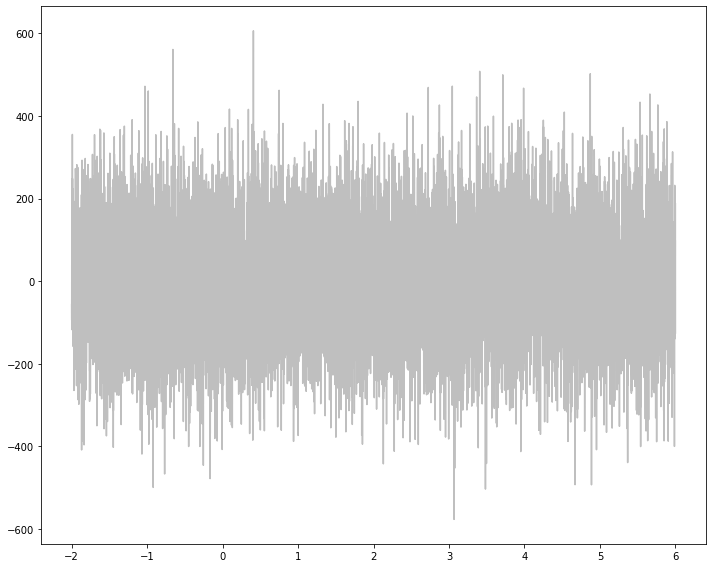

In [ ]:
plt.plot(xnew,v1,color='grey',alpha=0.5)

In [ ]:
np.savetxt("drive/MyDrive/x.csv", xnew)
np.savetxt("drive/MyDrive/v1.csv", v1)
np.savetxt("drive/MyDrive/v2.csv", v2)

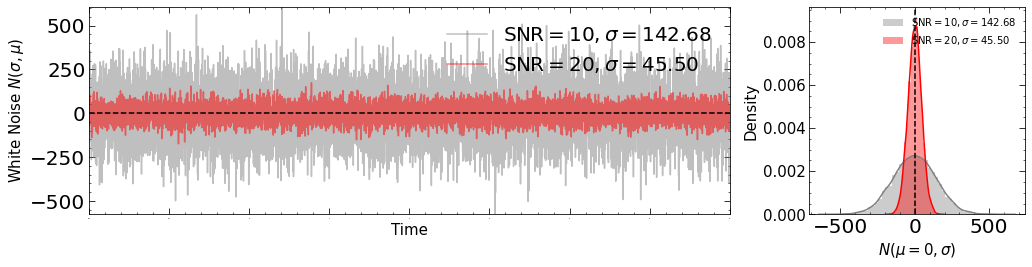

In [ ]:
#from matplotlib.transforms import Affine2D
#import mpl_toolkits.axisartist.floating_axes as floating_axes

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams["figure.autolayout"] = True
fig1 = plt.figure(1)
frame1=fig1.add_axes((.1,.65,.89,.36))


plt.plot(xnew,v1,color='grey',alpha=0.5,label=r'SNR$=%s, \sigma=%.2f$'%(snr1,sdiv1))
plt.plot(xnew,v2,color='r',alpha=0.5,label=r'SNR$=%s, \sigma=%.2f$'%(snr2,sdiv2))
plt.xlabel('Time',fontsize=15)
plt.ylabel('White Noise $N(\sigma, \mu)$',fontsize=15)
#plt.ylabel('$\mu$',fontsize=25)
plt.legend(fontsize=20,frameon=False)
plt.autoscale(enable=True, axis=u'both', tight=True)
plt.axhline(0,linestyle='--',c='black')
frame1.yaxis.set_ticks_position('both')
frame1.xaxis.set_ticks_position('both')
frame1.minorticks_on()
frame1.tick_params(which = 'minor',direction="in")
frame1.tick_params(direction="in",length=6)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.tick_params(axis='x', which='major', labelsize=2)



frame2=fig1.add_axes((1.1,0.65,.3,.36)) # left, bottom, width, height

sns.distplot(v1,color='grey',label=r'SNR$=%s, \sigma=%.2f$'%(snr1,sdiv1))
sns.distplot(v2,color='r',label=r'SNR$=%s, \sigma=%.2f$'%(snr2,sdiv2))

frame2.yaxis.set_ticks_position('both')
frame2.xaxis.set_ticks_position('both')
frame2.tick_params(direction="in",length=6)
frame2.tick_params(which = 'minor',direction="in")
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.axvline(0,linestyle='--',color='black')
frame2.set_ylabel('Density',fontsize=15)
frame2.set_xlabel(r'$N(\mu =0, \sigma)$',fontsize=15)
frame2.minorticks_on()
plt.grid(False)
plt.legend(fontsize=10,loc='upper right',frameon=False)
plt.tight_layout()
plt.savefig('drive/MyDrive/AWGN2.pdf',bbox_inches='tight')
#files.download('drive/MyDrive/AWGN2.pdf')

In [ ]:
import matplotlib
import io
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
from google.colab import files
from scipy.interpolate import interp1d
import seaborn as sns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

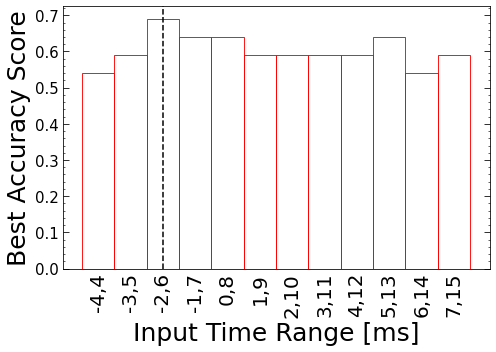

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]
x = [-4,-3,-2,-1,0,1,2,3,4,5,6,7]
y = [0.71,0.76,0.86,0.81,0.81,0.76,0.76,0.76,0.76,0.81,0.71,0.76]
y = [yy-0.17 for yy in y]
l = ['-4,4','-3,5','-2,6','-1,7','0,8','1,9','2,10','3,11','4,12','5,13','6,14','7,15']
xnew = np.linspace(-4,7,100)

fig, ax = plt.subplots()

f1 = interp1d(x,y, kind='cubic',fill_value="extrapolate")
ynew = pd.Series(f1(xnew))
#plt.plot(x,y,'o',c='black')
#ax=sns.barplot(x=x, y=y)
#plt.plot(xnew,ynew,c='b')
plt.bar(x,y,align='center', edgecolor='r', color='None',alpha=0.9,width=1,lw=1)

plt.xlabel('Input Time Range [ms]',fontsize=25)
plt.ylabel('Best Accuracy Score',fontsize=25)
#plt.text(-0.2,0.825,'Rolling Window length of 8 X steps',fontsize=12)
plt.axvline(-2,linestyle='--',c='black')
plt.xticks(x, l, rotation=90,fontsize=20); # vertical
plt.yticks(fontsize=15)
ax.yaxis.set_ticks_position('both')
ax.minorticks_on()
ax.xaxis.set_tick_params(which='minor', bottom=False,top=False)
ax.tick_params(length=6,left=True)
ax.tick_params(which = 'both',direction="in")

#ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
#ax.xaxis.set_ticks_position('both')
#ax.tick_params(axis='both', which='minor', labelsize=12)
#ax.tick_params(axis='both', which='major', labelsize=20)


plt.tight_layout()
plt.tick_params( bottom = False)
plt.tight_layout()
plt.savefig("drive/MyDrive/Rolling_window.pdf", bbox_inches='tight')
files.download('drive/MyDrive/Rolling_window.pdf')

0 140.5111782733049
0 44.433536005760864


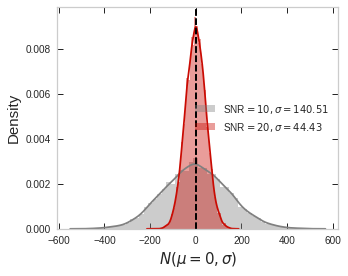

In [ ]:
plt.rcParams['figure.figsize'] = [5, 4]
fig, ax = plt.subplots()
noise_snr(10,ynew,'grey')
noise_snr(20,ynew,'r')
plt.grid(False)
plt.tight_layout()
#plt.savefig("drive/MyDrive/Noise-1.pdf", bbox_inches='tight')
#files.download('drive/MyDrive/Noise-1.pdf')


buf = io.BytesIO()
plt.savefig(buf, format='png',bbox_inches='tight')
buf.seek(0)
im = Image.open(buf)  #We open the current image saved in the buffer
img_01=im.rotate(-90, Image.NEAREST, expand = 1, fillcolor = (255,255,255))
buf.close()



0 0.014051117827330489


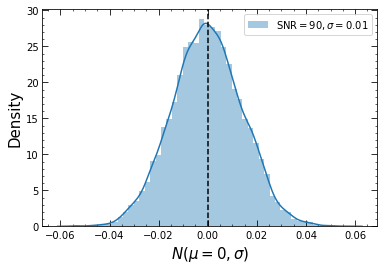

In [ ]:
fig, ax = plt.subplots()
noise_snr(90,ynew)
plt.savefig("drive/MyDrive/Noise-2.pdf", bbox_inches='tight')
#files.download('drive/MyDrive/Noise-2.pdf')

In [ ]:

def plot(i):
  plt.plot(Time.iloc[i],Signal.iloc[i],'.',label='%s'%i)
  plt.legend()
  plt.show()
  plt.close()
def noise(snr,input):
  target_snr_db = snr
  watts = input**2
  sig_avg_watts = np.mean(watts)
  sig_avg_db = 10 * np.log10(sig_avg_watts)
  # Calculate noise according to [2] then convert to watts
  noise_avg_db = sig_avg_db - target_snr_db
  noise_avg_watts = 10 ** (noise_avg_db / 10) # variance
  # Generate an sample of white noise
  mean_noise = 0 #mu 
  noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(watts))
  # Noise up the original signal
  x_volts = input
  y_volts = x_volts + noise_volts
  return y_volts

def fourier_inverse(time, signal,filter_low,filter_high):
  N = len(time)
  T = (time[-1]-time[0])/N # Length / N
  yf = fft(signal)
  xf = fftfreq(N, T)[:N//2]
  yf[filter_low:filter_high] = 0
  iftgw = scipy.fft.ifft(yf)
  return(time,iftgw)

def fourier(time, signal,filter_low,filter_high):
  N = len(time)
  T = (time[-1]-time[0])/N # Length / N
  yf = fft(signal)
  xf = fftfreq(N, T)[:N//2]
  yf[filter_low:filter_high] = 0
  iftgw = scipy.fft.ifft(yf)
  #print(np.shape(signal),np.shape(time))
  return(time,yf)    

In [ ]:
a = pd.read_csv('drive/MyDrive/ML_dataS1.csv')
A = a

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
y_pred = best_random.predict(X_test)
report = pd.DataFrame(list(precision_recall_fscore_support(y_test, y_pred)), #y_train, y_pred_train
            index=['Precision', 'Recall', 'F1-score', 'Support']).T

# Now add the 'Avg/Total' row
report.loc['Avg/Total', :] = precision_recall_fscore_support(y_test, y_pred,
    average='weighted')
report.loc['Avg/Total', 'Support'] = report['Support'].sum()

In [ ]:
best_random

RandomForestClassifier(max_depth=24, max_features='log2', min_samples_leaf=5,
                       min_samples_split=9, n_estimators=300, warm_start=True)

In [ ]:
%%time

np.random.seed(42)
random_state = 1
nc = 300
pca_model = PCA(n_components=nc) #120
X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.transform(X_test)
X_train = X_train_pca
X_test = X_test_pca

from sklearn.model_selection import RandomizedSearchCV
#pca_model = PCA(n_components=nc) #120
#X_train_pca = pca_model.fit_transform(X_train)
#X_test_pca = pca_model.transform(X_test)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200 , 
                                            stop = 300, num = 10)] 
                                            # returns 10 numbers 

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2',None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 10)]

max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split =[int(x) for x in np.linspace(1, 21, num = 10)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 11, num = 10)]

# Method of selecting samples for training each tree
bootstrap = [True, False]
oob_score = [True, False]
warm_start= [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'oob_score': oob_score,
               'warm_start': warm_start}
print(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 10, cv = 5, verbose=10, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

print('Best Fit Parameter',rf_random.best_params_)


from sklearn import metrics
random_state = 1
def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

filename = 'RF_GW_highres_PCA_model_FREQ.sav' # original is without -2 in name
joblib.dump(best_random,  'drive/MyDrive/'+filename )

{'n_estimators': [200, 211, 222, 233, 244, 255, 266, 277, 288, 300], 'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [1, 13, 25, 37, 49, 61, 73, 85, 97, 110, None], 'min_samples_split': [1, 3, 5, 7, 9, 12, 14, 16, 18, 21], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 11], 'bootstrap': [True, False], 'oob_score': [True, False], 'warm_start': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Fit Parameter {'warm_start': True, 'oob_score': False, 'n_estimators': 244, 'min_samples_split': 21, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 61, 'bootstrap': False}
0.65
[[3 4 1 0]
 [0 2 0 0]
 [0 1 3 1]
 [0 0 0 5]]
CPU times: user 1.83 s, sys: 78.1 ms, total: 1.91 s
Wall time: 52.4 s


In [ ]:
filename = 'RF_GW_highres_PCA_model_FREQ.sav'
loaded_model = joblib.load('drive/MyDrive/'+filename)


def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print ('accuracy',accuracy)
    print(confusion_matrix(y_test,y_pred))
    

#best_random = rf_random.best_estimator_
#evaluate(loaded_model, X_test, y_test)
evaluate(best_random, X_test, y_test)


accuracy 0.65
[[3 4 1 0]
 [0 2 0 0]
 [0 1 3 1]
 [0 0 0 5]]


# Read data and plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

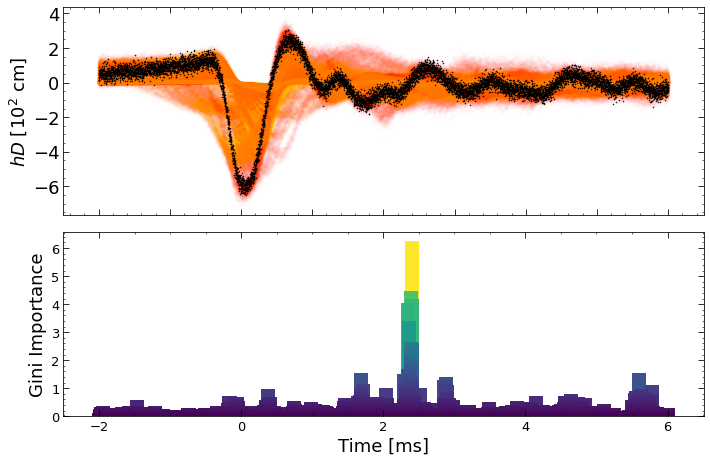

In [ ]:
F = (30.86 * 8.8524/100000)
gini = pd.read_csv('drive/MyDrive/Gini.csv')
plt.rcParams['figure.figsize'] = [10, 8]
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig1 = plt.figure(1)
frame1=fig1.add_axes((.1,.65,.89,.36))
for j in range(100):
    frame1.plot(TX[j],F*TY[j],'.',color = (1, j / 100.0, 0, 0.5),alpha=0.009)
frame1.plot(TX[20],F*TY[20],'.',c='black',markersize=1)

#frame1.set_xlabel('Time (ms)',fontsize=20)
frame1.set_ylabel(r'$hD$ $\mathrm{[10^2\ cm]}$',fontsize=18)

plt.xlim(-2.5,6.5)
#plt.ylim(0.9,1.1)
frame1.tick_params(axis='both', direction="in",which='minor', labelsize=15)
frame1.tick_params(axis='both', direction="in",which='major', labelsize=12)
frame1.yaxis.set_ticks_position('both')
frame1.xaxis.set_ticks_position('both')
frame1.minorticks_on()
#frame1.tick_params(which = 'both',direction="in")
frame1.tick_params(length=6)

#plt.legend(prop={'size': 20},frameon=False)
#plt.text(-2.05,-2000,"SNR $=%s$"%txt,fontsize=25,color='black')
plt.yticks(fontsize=18);plt.xticks(fontsize=18)
#frame1.axes.xaxis.set_visible(False)
frame1.set_xticklabels([])


frame2=fig1.add_axes((.1,.3,.89,.32)) # left, bottom, width, height


plt.bar(gini.Time,gini['Gini']*1000,alpha=0.99,color=my_cmap(rescale(gini['Gini'])),width = 0.2)
#value = np.random.normal(loc=2.5,scale=np.std(gini['Time']),size=1000)
#sns.displot(value,kind="kde")

plt.xlabel('$z_{spec}$',fontsize=25)
frame2.tick_params(axis='both', direction="in",which='minor', labelsize=15)
frame2.tick_params(axis='both', direction="in",which='major', labelsize=13)

frame2.set_xlabel('Time [ms]',fontsize=18)
frame2.set_ylabel('Gini Importance',fontsize=18)

frame2.yaxis.set_ticks_position('both')
frame2.xaxis.set_ticks_position('both')
frame2.tick_params(direction="in",length=6)
frame2.minorticks_on()
plt.tight_layout()
plt.savefig("drive/MyDrive/Gini2.jpg", bbox_inches='tight',dpi=1000)
files.download('drive/MyDrive/Gini2.jpg')

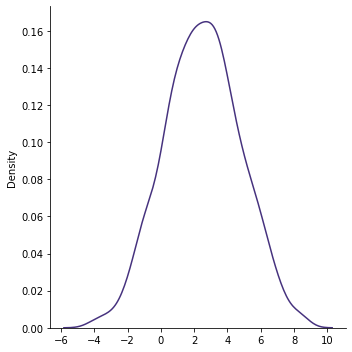

In [ ]:
value = np.random.normal(loc=2.5,scale=np.std(gini['Time']),size=1000)
sns.set_palette('viridis')
sns.displot(value,kind="kde")

PCA

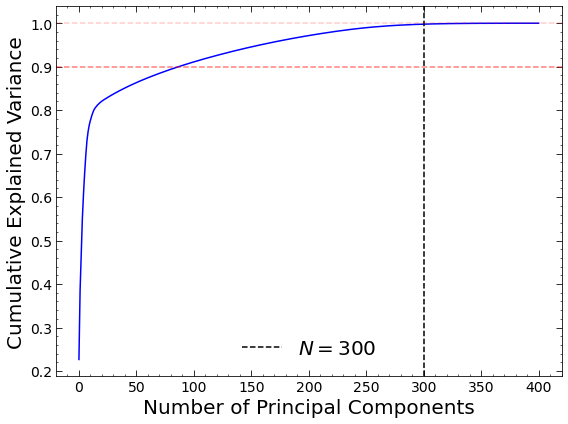

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]
pca = PCA()
pca.fit(X.T)
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_),c='b')
ax.set_xlabel('Number of Principal Components',fontsize=20)
ax.set_ylabel('Cumulative Explained Variance',fontsize=20)
plt.axvline(300,linestyle='--',c='black',label='$N = 300$')
plt.axhline(.90,linestyle='--',c='r',alpha=0.5)
plt.axhline(1,linestyle='--',c='r',alpha=0.2)
#plt.xlim(-0.9,100)
#plt.ylim(0.9,1.1)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.minorticks_on()
ax.tick_params(which = 'both',direction="in")
ax.tick_params(length=6)
plt.legend(prop={'size': 20},frameon=False)
#plt.text(-1.35,-0.2,"%s"%txt,fontsize=25,color='red')
plt.yticks(fontsize=14);plt.xticks(fontsize=14)
plt.tight_layout()
plt.savefig("drive/MyDrive/PCA.pdf", bbox_inches='tight')
#files.download('drive/MyDrive/PCA.pdf')
plt.show()